In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath
from jwlab.cluster_analysis_perm import cluster_analysis_procedure
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
import more_itertools as mit
from sklearn.metrics import accuracy_score


In [2]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

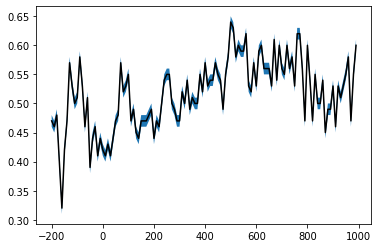

Valid windows are: [7, 8, 11, 12, 27, 29, 30, 44, 45, 46, 53, 58, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 101, 103, 106, 110, 112, 114, 115, 116, 118, 119]

Clusters are: [[240, 250, 260], [400, 410, 420, 430, 440, 450, 460], [480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780], [940, 950, 960]]

The max t mass is: 334.250729857239

334.250729857239


In [3]:
tmass = cluster_analysis_procedure(11, False, "permutation", [-200, 1000, [10], 10], [3, 100])
print(tmass)

In [4]:
itr = 50 
arrTmass = []

for i in range(itr):
    tmass = cluster_analysis_procedure(11, True, "permutation", [-200, 1000, [10], 10], [3, 100])
    arrTmass.append(round(tmass, 4))
    print(i)
print(arrTmass)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
[47.7112, 64.6511, 120.0113, 45.1397, 60.1636, 63.0742, 49.6926, 30.38, 67.766, 74.4049, 52.7486, 39.1841, 29.3903, 55.7266, 58.3928, 54.7743, 52.3294, 54.7525, 99.0246, 42.4915, 46.6578, 47.847, 37.8852, 53.5189, 82.3631, 45.4186, 63.5445, 83.9704, 43.0318, 28.1841, 40.0364, 25.622, 63.4193, 47.8748, 36.7849, 46.8927, 46.902, 44.7268, 55.7992, 68.5611, 66.4496, 38.149, 69.5817, 25.8018, 64.4928, 46.9736, 94.9459, 31.5191, 16.5748, 12.7555]


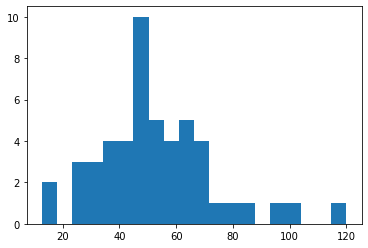

In [5]:
import matplotlib.pyplot as plt

plt.hist(arrTmass, bins = 20)
plt.show()